In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
class 완전연결:
    def __init__ (self, 입력수, 출력수, 활성화=None):
        self.W = np.random.randn(입력수, 출력수)
        self.b = np.random.randn(출력수)
        self.활성화 = 활성화

    def __call__ (self, Xs):
        Zs = Xs @ self.W + self.b
        if self.활성화:
            Zs = self.활성화(Zs)
        return Zs
    
class 신경망:
        def __init__ (self):
            self.계층목록 = []
            
        def 추가(self, 계층):
            self.계층목록.append(계층)

        def __call__ (self, Xs):
            # 순전파 (forward propagation; feed forward)
            계층출력 = Xs
            for 계층 in self.계층목록:
                계층출력 = 계층(계층출력)
            return 계층출력    
    

In [49]:
import pickle

with open('data/mnist/mnist_ndarray.pkl', 'rb') as 파일:
    mnist = pickle.load(파일)

(train_images, train_labels), (test_images, test_labels) = mnist

assert (28, 28) == train_images.shape[1:] == test_images.shape[1:]
assert set(np.unique(train_labels)) == set(range(10))
assert len(train_images) == len(train_labels)
assert len(test_images) == len(test_labels)


In [52]:
data = [(1, 2), (3, 4)]
(x, y), (z, k) = data

In [50]:
def 전처리(이미지들, 목표형상):
    X = 이미지들.reshape(-1, *목표형상)
    X = X / 255
    return X.astype(np.float32)

목표형상 = (784, )
X_train = 전처리(train_images, 목표형상)
X_test = 전처리(test_images, 목표형상)

assert 목표형상 == X_train.shape[1:] == X_test.shape[1:]    
assert np.allclose(1.0, X_train.max()) and np.allclose(0.0, X_train.min())
assert np.allclose(1.0, X_test.max()) and np.allclose(0.0, X_test.min())


In [54]:

step = lambda z: np.where(z > 0, 1, -1)
sigmoid = lambda z: 1 / (1 + np.exp(-z))
은닉층활성화 = sigmoid


model = 신경망()
# 은닉층
model.추가(완전연결(784, 50, 은닉층활성화))
model.추가(완전연결(50, 100, 은닉층활성화))
# 출력층
model.추가(완전연결(100, 10))

outputs = model(X_test)
y_pred = outputs.argmax(axis=1)
accuracy = (y_pred == test_labels).mean()
print(f"정확도: {accuracy:.2%}")

정확도: 10.41%


In [62]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
train_labels


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 신경망 학습

손실: 0.86
손실2: 0.81


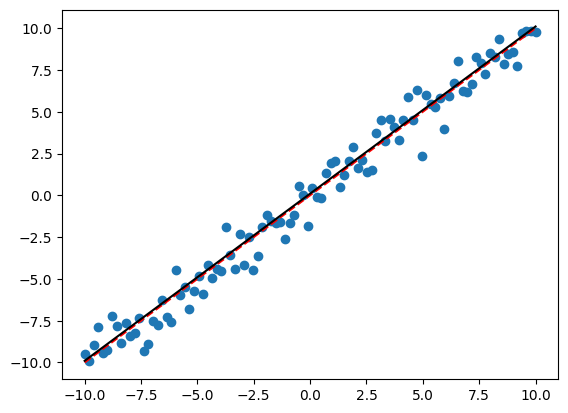

In [80]:
from sklearn.linear_model import LinearRegression

random = np.random.RandomState(42)
xs = np.linspace(-10, 10, 100)
noise = random.randn(len(xs))
ys = xs + noise

# 단층을 사용한 선형 회귀
model = 신경망()
model.추가(완전연결(1, 1))
# 매개변수 수동 설정
layer1 = model.계층목록[0]
layer1.W = np.array([[1.0]])
layer1.b = np.array([0.1])

# 모형 출력
Xs = xs.reshape(-1, 1)
y_pred = model(Xs)

linreg = LinearRegression()
linreg.fit(Xs, ys)
y_pred_2 = linreg.predict(Xs)


# 손실: 평균제곱오차
def 평균제곱오차(y, y_pred):
    오차 = y - y_pred
    return (오차 ** 2).mean()

손실 = 평균제곱오차(ys, y_pred.flatten())
print(f"손실: {손실:.2f}")
손실2 = 평균제곱오차(ys, y_pred_2)
print(f"손실2: {손실2:.2f}")


plt.scatter(xs, ys)
plt.plot(xs, ys - noise, 'r--')
plt.plot(xs, y_pred, 'k-')
plt.show()


# 분류 손실 평가

In [82]:
model = 신경망()
# 은닉층
model.추가(완전연결(784, 50, 은닉층활성화))
model.추가(완전연결(50, 100, 은닉층활성화))
# 출력층
model.추가(완전연결(100, 10))

outputs = model(X_test)
y_pred = outputs.argmax(axis=1)
accuracy = (y_pred == test_labels).mean()
print(f"정확도: {accuracy:.2%}")

정확도: 7.04%


In [113]:
pd.DataFrame(outputs[:5])

,0,1,2,3,4,5,6,7,8,9
0,-2.484982,-9.392676,-0.032082,7.923334,5.628811,1.670133,0.173289,4.829642,3.130128,2.683316
1,-0.391650,-13.418722,-7.536231,3.840800,5.153160,-0.039427,2.733676,3.564471,4.994921,2.679430
2,-2.892650,-7.504067,-0.700959,1.288062,2.922028,-0.774543,1.023327,0.217403,6.724241,3.351865
3,-0.176047,-7.114998,-1.624807,4.483433,7.113377,1.504571,2.079972,4.355487,4.725024,-0.280228
4,-0.851224,-7.387826,-1.845916,4.372290,5.291282,2.988765,1.305570,5.157399,4.072776,1.670683


In [119]:


onehot = np.eye(10)
onehot[test_labels][:5]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [114]:
test_labels[0]
onehot = np.eye(10)
print(test_labels[:5])
pd.DataFrame(onehot[test_labels][:5].astype('int'))

[7 2 1 0 4]


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [131]:
def 오차제곱합(y, y_pred):
    return 0.5 * np.sum((y - y_pred) ** 2)

정답 = 3
y = onehot[정답]
print(f'SSE={오차제곱합(y, y)}') # 정답을 정확히 맞추는 경우 -> 손실=0

print(f'정답: {정답}, 예측: {5}')
y_pred = onehot[5]
print(f'y:\t{y}\ny_pred:\t{y_pred}') # 정답을 틀리는 경우 -> 손실=1
print(f'SSE={오차제곱합(y, y_pred)}') # 오답 -> 손실=1


print(f'정답: {정답}, 예측: {2}')
y_pred = onehot[2]
print(f'y:\t{y}\ny_pred:\t{y_pred}')
print(f'SSE={오차제곱합(y, y_pred)}') # 오답 -> 손실=1


SSE=0.0
정답: 3, 예측: 5
y:	[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_pred:	[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
SSE=1.0
정답: 3, 예측: 2
y:	[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y_pred:	[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
SSE=1.0


In [132]:
y = onehot[test_labels[0]]
print(y)
yi_pred = outputs[0]
print(yi_pred)
error = y - yi_pred
print(error)
print(f'SSE={오차제곱합(y, yi_pred):.2f}')
pd.DataFrame([y, yi_pred, error], index=['y', 'yi_pred', 'error'])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[-2.48498237 -9.3926757  -0.03208189  7.92333406  5.62881117  1.67013266
  0.17328941  4.82964214  3.13012777  2.68331573]
[ 2.48498237  9.3926757   0.03208189 -7.92333406 -5.62881117 -1.67013266
 -0.17328941 -3.82964214 -3.13012777 -2.68331573]
SSE=111.67


,0,1,2,3,4,5,6,7,8,9
y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
yi_pred,-2.484982,-9.392676,-0.032082,7.923334,5.628811,1.670133,0.173289,4.829642,3.130128,2.683316
error,2.484982,9.392676,0.032082,-7.923334,-5.628811,-1.670133,-0.173289,-3.829642,-3.130128,-2.683316


In [140]:
from sklearn.linear_model import LogisticRegression # 1959년 제안된 알고리즘

logreg = LogisticRegression(C=0.001, max_iter=5)
logreg.fit(X_train, train_labels)
outputs = logreg.predict_proba(X_test)



/opt/homebrew/Caskroom/miniconda/base/envs/pydeep/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [141]:
결과확률 = pd.DataFrame(outputs[:5], columns=[f'Pr(y={i})' for i in range(10)])
print(test_labels[:5])
결과확률.round(2)

[7 2 1 0 4]


,Pr(y=0),Pr(y=1),Pr(y=2),Pr(y=3),Pr(y=4),Pr(y=5),Pr(y=6),Pr(y=7),Pr(y=8),Pr(y=9)
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.02
1,0.02,0.02,0.48,0.17,0.00,0.10,0.17,0.00,0.05,0.00
2,0.00,0.94,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.00
3,0.93,0.00,0.00,0.00,0.00,0.02,0.03,0.01,0.00,0.00
4,0.01,0.00,0.04,0.00,0.72,0.01,0.02,0.05,0.02,0.12


In [142]:
y = onehot[test_labels[1]]
yi_pred = outputs[1]
error = y - yi_pred
print(f'SSE={오차제곱합(y, yi_pred):.2f}')
pd.DataFrame([y, yi_pred, error], index=['y', 'yi_pred', 'error']).round(2)

SSE=0.17


,0,1,2,3,4,5,6,7,8,9
y,0.00,0.00,1.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
yi_pred,0.02,0.02,0.48,0.17,0.0,0.1,0.17,0.0,0.05,0.0
error,-0.02,-0.02,0.52,-0.17,-0.0,-0.1,-0.17,-0.0,-0.05,-0.0


In [143]:
y = np.array([1, 0, 0])
y_pred_1 = np.array([0.50, 0.25, 0.25])
y_pred_2 = np.array([0.25, 0.50, 0.25])
y_pred_3 = np.array([0.25, 0.25, 0.50])

print(f'SSE(y, y_pred_1)={오차제곱합(y, y_pred_1):.2f}')
print(f'SSE(y, y_pred_2)={오차제곱합(y, y_pred_2):.2f}')
print(f'SSE(y, y_pred_3)={오차제곱합(y, y_pred_3):.2f}')


SSE(y, y_pred_1)=0.19
SSE(y, y_pred_2)=0.44
SSE(y, y_pred_3)=0.44


# 교차 엔트로피

In [147]:
H = 정보엔트로피측정 = lambda 확률: -np.sum(확률 * np.log2(확률))

확률1 = np.array([1/4, 1/4, 1/4, 1/4])
확률2 = np.array([1/2, 1/4, 1/8, 1/8])

print(f'H(확률1)={H(확률1):.2f}')
print(f'H(확률2)={H(확률2):.2f}')

H(확률1)=2.00
H(확률2)=1.75


In [152]:
CH = 교차엔트로피오차 = lambda y, y_pred: -np.sum(y * np.log(y_pred))

y = np.array([1, 0, 0])
y_pred_0 = np.array([0.33, 0.34, 0.33])
y_pred_1 = np.array([0.50, 0.25, 0.25])
y_pred_2 = np.array([0.60, 0.20, 0.20])
y_pred_3 = np.array([0.80, 0.10, 0.10])

print(f'SSE(y, y_pred_1)={CH(y, y_pred_0):.2f}')
print(f'SSE(y, y_pred_1)={CH(y, y_pred_1):.2f}')
print(f'SSE(y, y_pred_2)={CH(y, y_pred_2):.2f}')
print(f'SSE(y, y_pred_3)={CH(y, y_pred_3):.2f}')

SSE(y, y_pred_1)=1.11
SSE(y, y_pred_1)=0.69
SSE(y, y_pred_2)=0.51
SSE(y, y_pred_3)=0.22


In [154]:
model = 신경망()
# 은닉층
model.추가(완전연결(784, 50, 은닉층활성화))
model.추가(완전연결(50, 100, 은닉층활성화))
# 출력층
model.추가(완전연결(100, 10))

outputs = model(X_test)
y_pred = outputs.argmax(axis=1)
accuracy = (y_pred == test_labels).mean()
print(f"정확도: {accuracy:.2%}")

pd.DataFrame(sigmoid(outputs[:5])).round(3)

정확도: 8.06%


,0,1,2,3,4,5,6,7,8,9
0,0.000,0.218,0.000,0.049,0.984,0.516,0.056,0.998,1.000,0.999
1,0.001,0.005,0.040,0.105,0.998,0.026,0.486,0.997,0.999,0.999
2,0.000,0.918,0.006,0.013,0.997,0.002,0.163,0.973,0.995,1.000
3,0.000,0.814,0.003,0.089,1.000,0.000,0.054,0.995,0.868,1.000
4,0.000,0.336,0.000,0.798,0.038,0.000,0.337,0.183,0.976,0.993


In [163]:
z_last = np.array([1.2, 3.4, -4.5])
print(f'z_last={z_last} -> exp(z)={np.exp(z_last)}')

def softmax(z):
    z_exp = np.exp(z)
    return z_exp / z_exp.sum()

확률 = softmax(z_last)
assert np.allclose(1.0, 확률.sum())
pd.DataFrame([z_last, np.exp(z_last), 확률], index=['z', 'exp(z)', 'softmax(z)'])

z_last=[ 1.2  3.4 -4.5] -> exp(z)=[3.32011692e+00 2.99641000e+01 1.11089965e-02]


,0,1,2
z,1.200000,3.400000,-4.500000
exp(z),3.320117,29.964100,0.011109
softmax(z),0.099717,0.899949,0.000334


In [169]:
Zs = np.array([z_last, z_last])
# axis=1: 행 방향으로 softmax를 계산
# 방법1: for문을 사용한 방법
results = []
for zi in Zs:
    results.append(softmax(zi))
results = np.array(results)

# 방법2: numpy along axis 함수를 사용한 방법
확률 = np.apply_along_axis(softmax, 1, Zs)

def softmax_batch(Zs):
    return np.apply_along_axis(softmax, 1, Zs)
softmax_batch = lambda Zs: np.apply_along_axis(softmax, 1, Zs)


# results와 확률이 같은지 확인
assert np.allclose(results, 확률)
assert np.allclose(확률, softmax_batch(Zs))
assert np.allclose(1.0, 확률.sum(axis=1))


pd.DataFrame(확률, columns=[f'Pr(y={i}|x)' for i in range(3)]).round(3)

,Pr(y=0|x),Pr(y=1|x),Pr(y=2|x)
0,0.1,0.9,0.0
1,0.1,0.9,0.0


In [177]:
예측확률 = softmax_batch(outputs)
y = onehot[test_labels]
CEE = CH(y, 예측확률)

# 평균 교차엔트로피
CEE = CEE / len(y)
print(f'CEE={CEE:.2f}')

pd.DataFrame([y[0], outputs[0], 예측확률[0]], index=['y', 'output', 'prob']).round(2)


CEE=10.10


,0,1,2,3,4,5,6,7,8,9
y,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
output,-10.67,-1.28,-8.41,-2.96,4.09,0.06,-2.82,6.30,7.90,7.04
prob,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.12,0.61,0.26


# 최적화

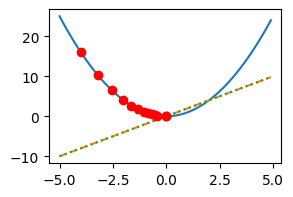

In [192]:
xs = np.arange(-5, 5, 0.1)
f = lambda x: x ** 2
dfdx = lambda x: 2 * x # 해석적 미분 방법


def 수치미분(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2 * h)


plt.figure(figsize=(3, 2))
plt.plot(xs, f(xs))
plt.plot(xs, dfdx(xs), '--')
plt.plot(xs, 수치미분(f, xs), ':')
plt.plot(-4, f(4), 'ro')
plt.plot(0,0, 'ro')
# 경사 하강
학습률 = 0.1
반복횟수 = 10
x = -4
for 반복 in range(반복횟수):
    # x = x - dfdx(x) * 학습률
    x = x - 수치미분(f, x) * 학습률
    plt.plot(x, f(x), 'ro') # 한 걸을 내려간 지점: "낮은 손실" 희망

plt.plot(0, 0, 'ro') # 목표점 : "최저 손실"
plt.show()

# 신경망 학습 알고리즘 구현

In [193]:
import numpy as np
import time

sigmoid = lambda z: 1 / (1 + np.exp(-z))

def softmax(z):
    if z.ndim == 1:
        z = z.reshape(1, -1)
    exp_z = np.exp(z - np.max(z, axis=1).reshape(-1, 1))
    return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

def 경사산출(f, x):
    h = 1e-4
    경사 = np.empty_like(x)
    
    for i, xi in enumerate(x):
        x[i] = xi + h
        fxh1 = f(x)
        x[i] = xi - h
        fxh2 = f(x)
        
        경사[i] = (fxh1 - fxh2) / (2 * h)
        x[i] = xi # 원래 값 복원

    return 경사

def 경사산출_2d(f, X):
    경사 = np.zeros_like(X)
    
    for j, xj in enumerate(X):
        경사[j] = 경사산출(f, xj)
    return 경사

def 교차엔트로피오차(y, y_pred):
    delta = 1e-7
    배치크기 = y.shape[0]
    return -np.sum(y * np.log(y_pred + delta)) / 배치크기

class 완전연결:
    def __init__(self, 입력, 출력, 활성화=None):
        self.W = np.random.randn(입력, 출력)
        self.b = np.zeros(출력)
        self.activation = 활성화
        
    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        if self.activation:
            return self.activation(Z)
        return Z

class 신경망:
    def __init__(self, 손실함수):
        self.layers = []
        self.loss_func = 손실함수
        
    def add(self, layer):
        self.layers.append(layer)
        
    def __call__(self, X):
        """순전파 (feedforward)"""
        output = X
        for layer in self.layers:
            output = layer.forward(output)
        return output
    
    def 손실산출(self, X, y):
        y_pred = self(X)
        손실 = self.loss_func(y, y_pred)
        return 손실
    
    def fit(self, X, y, 배치크기, 학습횟수, 학습률):
        """학습"""
        표본수 = X.shape[0]
        손실변화 = []
        for i in range(학습횟수):            
            print(f'학습 {i+1}/{학습횟수}')
            start_time = time.time()
            # 1. 미니배치
            배치색인 = np.random.choice(표본수, 배치크기)
            X_batch = X[배치색인]
            y_batch = y[배치색인]
            # 2. 경사 산출        
            f = lambda 매개변수: self.손실산출(X_batch, y_batch)
            층별경사 = []
            for layer in self.layers:
                dW = 경사산출_2d(f, layer.W)
                db = 경사산출(f, layer.b)
                층별경사.append((dW, db))
            # 3. 매개변수 갱신 (경사 하강)
            for layer, (dW, db) in zip(self.layers, 층별경사):
                layer.W -= dW * 학습률
                layer.b -= db * 학습률
            end_time = time.time()
            # (선택적) 손실확인
            손실 = self.손실산출(X_batch, y_batch)
            손실변화.append(손실)
            print(f'\t손실: {손실:.3f}, \t시간: {end_time - start_time:.1f}초')
        return 손실변화

    

In [198]:
model = 신경망(손실함수=교차엔트로피오차)
model.add(완전연결(784, 50, sigmoid))
model.add(완전연결(50, 100, sigmoid))
model.add(완전연결(100, 10, softmax))
    
배치크기 = 100
학습횟수 = 12
학습률 = 0.1

유형수 = len(np.unique(train_labels))
원핫행렬 = np.eye(유형수)
y_train = 원핫행렬[train_labels]

손실변화 = model.fit(X_train, y_train, 배치크기, 학습횟수, 학습률)

학습 1/12
	손실: 7.147, 	시간: 14.2초
학습 2/12
	손실: 5.532, 	시간: 14.1초
학습 3/12
	손실: 5.585, 	시간: 12.5초
학습 4/12
	손실: 5.612, 	시간: 13.0초
학습 5/12
	손실: 5.530, 	시간: 12.6초
학습 6/12
	손실: 5.701, 	시간: 13.4초
학습 7/12
	손실: 4.984, 	시간: 13.1초
학습 8/12
	손실: 4.464, 	시간: 13.6초
학습 9/12
	손실: 4.604, 	시간: 13.7초
학습 10/12
	손실: 4.852, 	시간: 14.1초
학습 11/12
	손실: 4.601, 	시간: 12.6초
학습 12/12
	손실: 4.500, 	시간: 13.9초


In [200]:
outputs = model(X_test)
y_pred = outputs.argmax(axis=1)
accuracy = (y_pred == test_labels).mean()
print(f"정확도: {accuracy:.2%}")

정확도: 13.14%
